# NBA Player Performance Prediction

In [1]:
# Importing necessary libraries.

import numpy as np # Numerical operations.
import pandas as pd # Manipulation and analysis.
import matplotlib.pyplot as plt # Plotting functionality. 
import seaborn as sns # Statistical data visualization.  

In [2]:
# Reading NBA data from a CSV file into a Pandas DataFrame. 

nba_df = pd.read_csv(r"C:\Users\rohit\OneDrive\Desktop\DataSets\NBA.csv", low_memory=False)   

In [3]:
# Displaying the first few rows of the NBA DataFrame. 

nba_df.head() 

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22101005,1610612750,MIN,Minnesota,1630162,Anthony Edwards,Anthony,F,NaN,36:22,...,0.0,8.0,8.0,5.0,3.0,1.0,1.0,1.0,15.0,5.0
1,22101005,1610612750,MIN,Minnesota,1630183,Jaden McDaniels,Jaden,F,NaN,23:54,...,2.0,4.0,6.0,0.0,0.0,2.0,2.0,6.0,14.0,10.0
2,22101005,1610612750,MIN,Minnesota,1626157,Karl-Anthony Towns,Karl-Anthony,C,NaN,25:17,...,1.0,9.0,10.0,0.0,0.0,0.0,3.0,4.0,15.0,14.0
3,22101005,1610612750,MIN,Minnesota,1627736,Malik Beasley,Malik,G,NaN,30:52,...,0.0,3.0,3.0,1.0,1.0,0.0,1.0,4.0,12.0,20.0
4,22101005,1610612750,MIN,Minnesota,1626156,D'Angelo Russell,D'Angelo,G,NaN,33:46,...,0.0,6.0,6.0,9.0,1.0,0.0,5.0,0.0,14.0,17.0


In [4]:
# Number of rows and number of columns of the nba_df. 

nba_df.shape 

(645953, 29)

In [5]:
# Calculating the number of duplicate rows in the NBA DataFrame. 

nba_df.duplicated().sum() 

0

In [6]:
# Calculating the number of missing values in each column of the NBA DataFrame. 

nba_df.isnull().sum() 

GAME_ID                   0
TEAM_ID                   0
TEAM_ABBREVIATION         0
TEAM_CITY                 0
PLAYER_ID                 0
PLAYER_NAME               0
NICKNAME             615591
START_POSITION       398738
COMMENT              540351
MIN                  105603
FGM                  105603
FGA                  105603
FG_PCT               105603
FG3M                 105603
FG3A                 105603
FG3_PCT              105603
FTM                  105603
FTA                  105603
FT_PCT               105603
OREB                 105603
DREB                 105603
REB                  105603
AST                  105603
STL                  105603
BLK                  105603
TO                   105603
PF                   105603
PTS                  105603
PLUS_MINUS           129264
dtype: int64

In [7]:
# Printing the percentage of NaN values in specific columns of the NBA DataFrame. 

print("\033[1m", end='') 
print('NICKNAME column contains', end=' ') 
print(str(int(round((nba_df['NICKNAME'].isnull().sum()/nba_df.shape[0])*100,0))) + '%', 'Nan values.')
print('START_POSITION column contanis', end=' ')
print(str(int(round((nba_df['START_POSITION'].isnull().sum()/nba_df.shape[0])*100,0))) + '%', 'Nan values.') 
print('COMMENT column contains', end=' ') 
print(str(int(round((nba_df['COMMENT'].isnull().sum()/nba_df.shape[0])*100,0))) + '%', 'Nan values.')   

NICKNAME column contains 95% Nan values.
START_POSITION column contanis 62% Nan values.
COMMENT column contains 84% Nan values.


In [8]:
# Dropping columns with a significant number of NaN values from the NBA DataFrame. 

nba_df.drop(['NICKNAME','START_POSITION','COMMENT'], axis=1, inplace=True) 

In [9]:
# Dropping rows with NaN values in the 'MIN' (minutes played) column.
# This action also removes NaN values in the 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 
# 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS' columns,
# as they contain the same number of NaN values. 

nba_df.dropna(subset=['MIN'], inplace=True)     

In [10]:
# The 'MIN' column data type is object ('O'), indicating it currently contains string values. 

nba_df['MIN'].dtype 

dtype('O')

In [11]:
# Replacing ':' with '.' in the 'MIN' column to convert it from object type to float type. 

nba_df['MIN'] = nba_df['MIN'].str.replace(':', '.') 

In [12]:
# Converting the 'MIN' column from object type to float type for numerical analysis. 

nba_df['MIN'] = nba_df['MIN'].astype(float)  

In [13]:
# Filtering the DataFrame to keep only rows where players have played at least 1 minute
# Players who played 0 minutes are not making any impact and won't contribute to the machine learning model. 

nba_df = nba_df[nba_df['MIN']!=0.0]  

In [14]:
# Dropping rows with NaN values in the 'PLUS_MINUS' column. 

nba_df.dropna(subset=['PLUS_MINUS'], inplace=True)     

In [15]:
# Correcting the calculation of points scored by each player in the 'PTS' column.
# The correct formula for calculating points in the NBA is:
# Points = (2 * FGM) + (3 * FG3M) + (1 * FTM) 

nba_df['PTS'] = (nba_df['FGM']*2) + (nba_df['FG3M']*3) + (nba_df['FTM']*1) 

In [16]:
# Creating a new column 'MODIFIED_PLUS_MINUS' based on the player's contribution:
# If the 'PLUS_MINUS' column value is greater than 0, assign 1 (positive contribution),
# otherwise assign 0 (negative or no contribution). 

nba_df['MODIFIED_PLUS_MINUS'] = nba_df.apply(lambda x: 1 if x['PLUS_MINUS']>0 else 0, axis=1)    

In [17]:
# Displaying a random sample of 10 rows to verify the correctness of the 'MODIFIED_PLUS_MINUS' column values. 

nba_df[['PLUS_MINUS','MODIFIED_PLUS_MINUS']].sample(10) 

,PLUS_MINUS,MODIFIED_PLUS_MINUS
433981,-6.0,0
435907,4.0,1
223918,-3.0,0
631231,17.0,1
617261,-11.0,0
75905,-16.0,0
187004,1.0,1
286559,13.0,1
316662,11.0,1
112188,-8.0,0


In [18]:
# Printing the summary information about the preprocessed DataFrame. 

nba_df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516595 entries, 0 to 643293
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   GAME_ID              516595 non-null  int64  
 1   TEAM_ID              516595 non-null  int64  
 2   TEAM_ABBREVIATION    516595 non-null  object 
 3   TEAM_CITY            516595 non-null  object 
 4   PLAYER_ID            516595 non-null  int64  
 5   PLAYER_NAME          516595 non-null  object 
 6   MIN                  516595 non-null  float64
 7   FGM                  516595 non-null  float64
 8   FGA                  516595 non-null  float64
 9   FG_PCT               516595 non-null  float64
 10  FG3M                 516595 non-null  float64
 11  FG3A                 516595 non-null  float64
 12  FG3_PCT              516595 non-null  float64
 13  FTM                  516595 non-null  float64
 14  FTA                  516595 non-null  float64
 15  FT_PCT           

In [19]:
# Displaying DataFrame after preprocessing. 

nba_df.sample(4)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS,MODIFIED_PLUS_MINUS
177265,20600267,1610612750,MIN,Minnesota,2229,Mike James,37.21,8.0,14.0,0.571,...,2.0,2.0,5.0,2.0,0.0,2.0,1.0,23.0,6.0,1
531675,21500034,1610612752,NYK,New York,1626170,Jerian Grant,21.10,3.0,7.0,0.429,...,1.0,2.0,0.0,3.0,0.0,3.0,3.0,9.0,7.0,1
305564,21100243,1610612753,ORL,Orlando,200755,JJ Redick,18.24,0.0,2.0,0.000,...,0.0,1.0,2.0,1.0,0.0,1.0,1.0,2.0,-10.0,0
397723,21801047,1610612758,SAC,Sacramento,203992,Bogdan Bogdanovic,22.36,3.0,6.0,0.500,...,5.0,6.0,3.0,2.0,0.0,0.0,1.0,12.0,27.0,1


In [20]:
# Shape of the preprocessed DataFrame. 

print("Shape of the DataFrame:", nba_df.shape)  

Shape of the DataFrame: (516595, 27)


In [21]:
# Printing the number of teams participated in the NBA. 

print("\033[1m", end='') 
print("Number of Teams Participated in NBA:")
teams = nba_df['TEAM_ABBREVIATION'].unique()
teams  

Number of Teams Participated in NBA:


array(['MIN', 'MIA', 'CLE', 'CHI', 'IND', 'SAS', 'MIL', 'GSW', 'TOR',
       'DEN', 'SAC', 'UTA', 'WAS', 'POR', 'ORL', 'LAC', 'ATL', 'DET',
       'BOS', 'DAL', 'HOU', 'NYK', 'MEM', 'CHA', 'NOP', 'PHX', 'LAL',
       'BKN', 'PHI', 'OKC', 'NOH', 'NJN', 'SEA', 'NOK'], dtype=object)

In [22]:
# Printing the count of unique teams participated in the NBA. 

print("\033[1m", end='')  
print("Number of Unique Teams are:", len(teams)) 

Number of Unique Teams are: 34


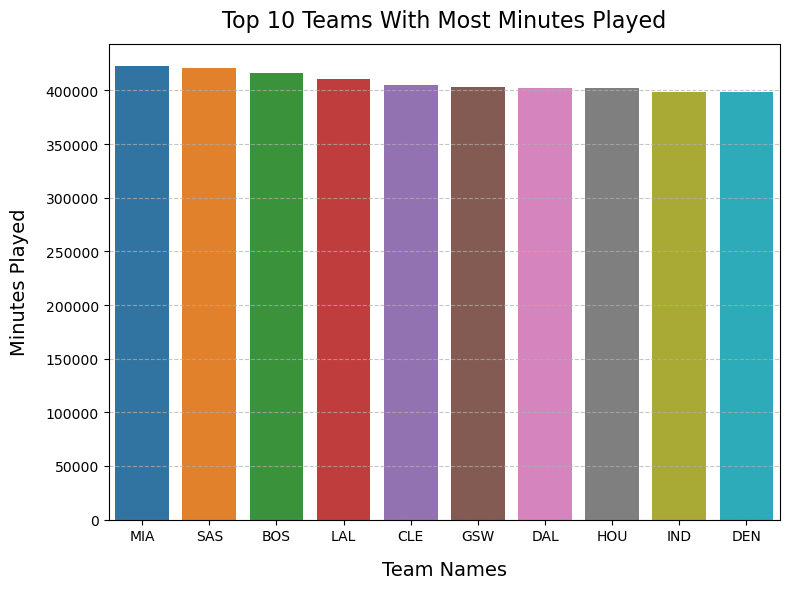

In [23]:
# Performing analysis on the total minutes played by each team.

team_analysis = nba_df.groupby(['TEAM_ABBREVIATION'])['MIN'].sum().sort_values(ascending=False).nlargest(10) 
team_analysis = team_analysis.reset_index()

# Creating a bar plot to visualize the top 10 teams with the most minutes played.

plt.figure(figsize=(8,6))

plt.title('Top 10 Teams With Most Minutes Played', fontsize=16, pad=12)
sns.barplot(data=team_analysis, x='TEAM_ABBREVIATION', y='MIN')
plt.xlabel('Team Names', fontsize=14, labelpad=12)
plt.ylabel('Minutes Played',fontsize=14, labelpad=12) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show() 

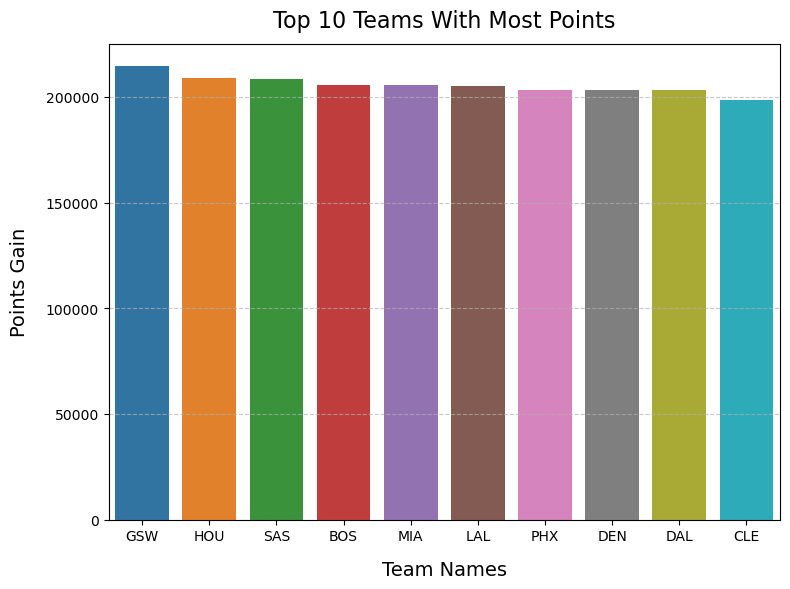

In [24]:
# Performing analysis on the total points scored by each team.

team_analysis = nba_df.groupby(['TEAM_ABBREVIATION'])['PTS'].sum().sort_values(ascending=False).nlargest(10) 
team_analysis = team_analysis.reset_index()

# Creating a bar plot to visualize the top 10 teams with the most points scored.

plt.figure(figsize=(8,6))

plt.title('Top 10 Teams With Most Points', fontsize=16, pad=12)
sns.barplot(data=team_analysis, x='TEAM_ABBREVIATION', y='PTS')
plt.xlabel('Team Names', fontsize=14, labelpad=12)
plt.ylabel('Points Gain',fontsize=14, labelpad=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()  

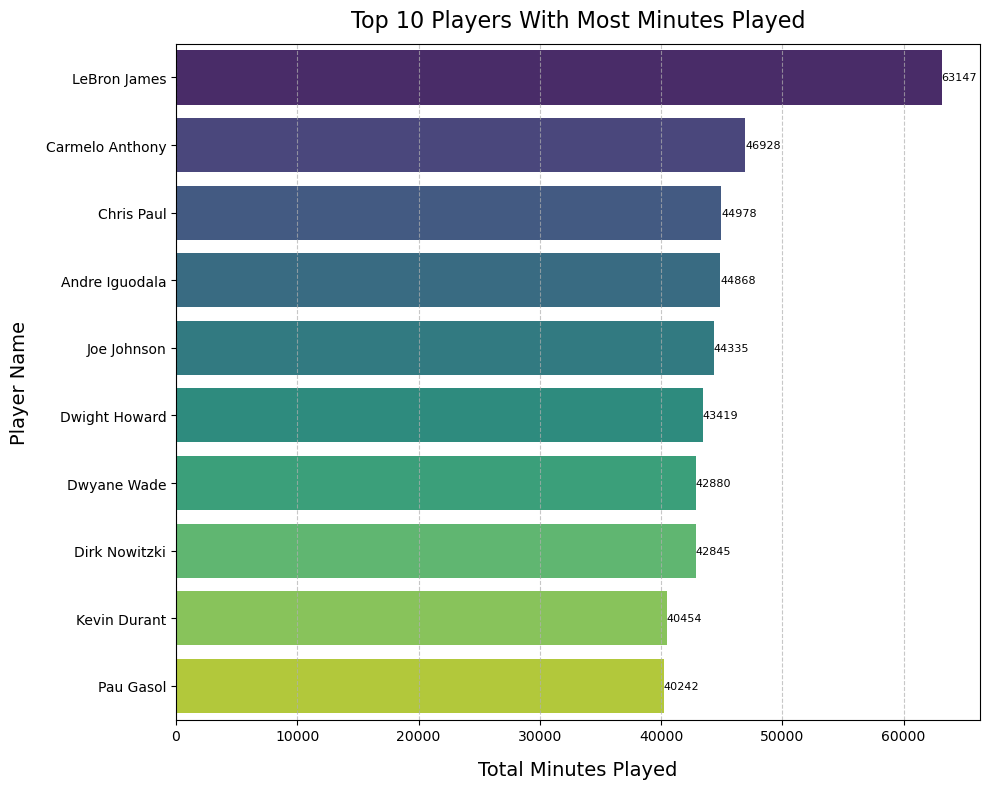

In [25]:
# Performing analysis on the total minutes played by each player.

players_analysis = nba_df.groupby('PLAYER_NAME')['MIN'].sum().sort_values(ascending=False).nlargest(10)
players_analysis = players_analysis.reset_index()

# Creating a bar plot to visualize the top 10 players with the most minutes played.

plt.figure(figsize=(10, 8))

data = sns.barplot(data=players_analysis, x='MIN', y='PLAYER_NAME', palette='viridis')

for val in data.containers:
    data.bar_label(val, fmt='%.0f', fontsize=8)

plt.title('Top 10 Players With Most Minutes Played', fontsize=16, pad=12)
plt.xlabel('Total Minutes Played', fontsize=14, labelpad=12)
plt.ylabel('Player Name', fontsize=14, labelpad=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show() 

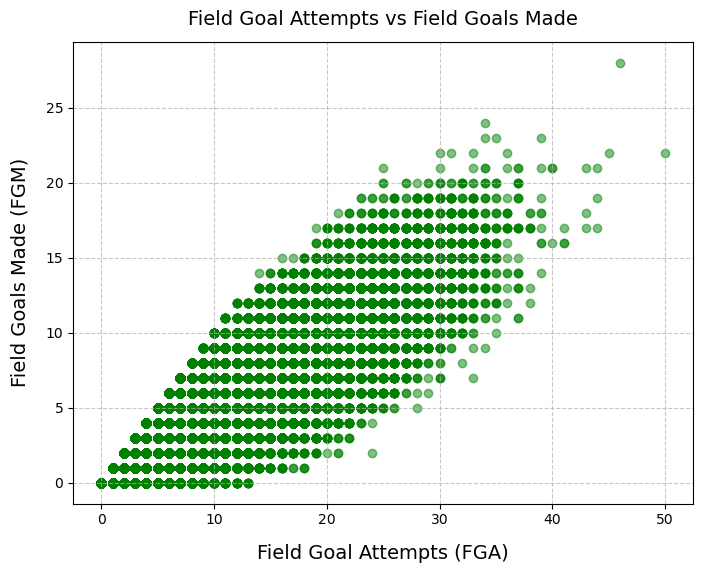

In [26]:
# Creating a scatter plot comparing field goal attempts to field goals made. 

plt.figure(figsize=(8, 6))

plt.scatter(nba_df['FGA'], nba_df['FGM'], color='Green', alpha=0.5)

plt.title('Field Goal Attempts vs Field Goals Made', fontsize=14, pad=12)
plt.xlabel('Field Goal Attempts (FGA)', fontsize=14, labelpad=12)
plt.ylabel('Field Goals Made (FGM)', fontsize=14, labelpad=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show() 

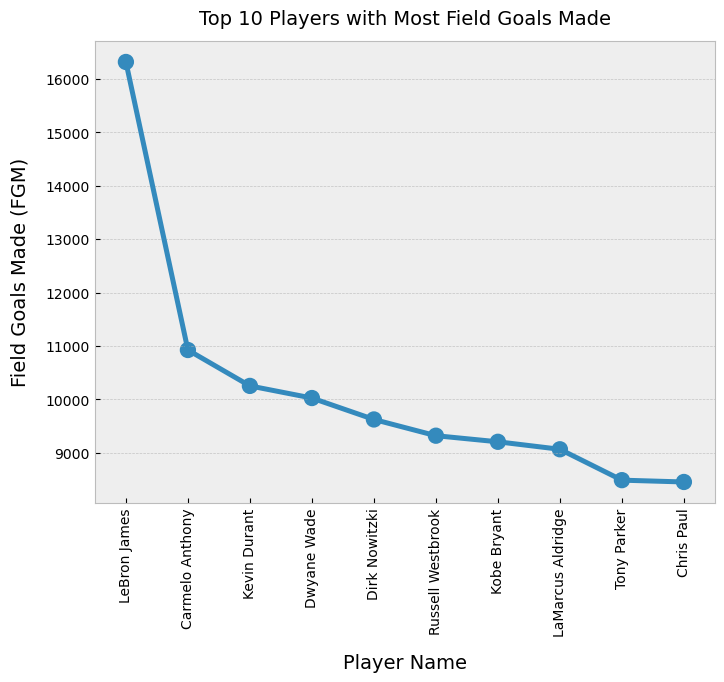

In [27]:
# Performing analysis on the total field goals made by each player.

players_analysis = nba_df.groupby('PLAYER_NAME')['FGM'].sum().sort_values(ascending=False).nlargest(10) 
players_analysis = players_analysis.reset_index()

# Creating a point plot to visualize the top 10 players with the most field goals made.

plt.style.use('bmh')
plt.figure(figsize=(8,6))

sns.pointplot(data=players_analysis, x='PLAYER_NAME', y='FGM')
plt.title('Top 10 Players with Most Field Goals Made', fontsize=14, pad=12)
plt.xlabel('Player Name', fontsize=14, labelpad=12) 
plt.ylabel('Field Goals Made (FGM)', fontsize=14, labelpad=12)
plt.xticks(rotation='vertical')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show() 

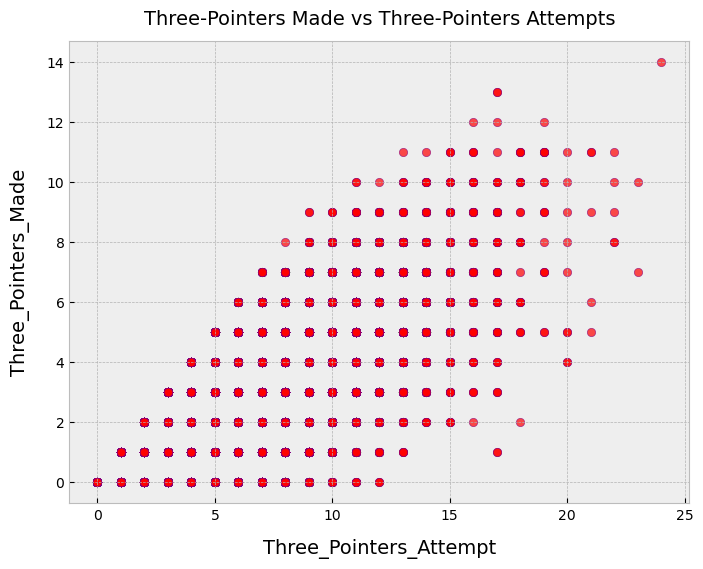

In [28]:
# Creating a scatter plot comparing three-pointers made to three-pointers attempted. 

plt.figure(figsize=(8,6))

plt.scatter(nba_df['FG3A'], nba_df['FG3M'], alpha=0.7, color='red', edgecolors='purple')  
plt.title('Three-Pointers Made vs Three-Pointers Attempts', fontsize=14, pad=12)
plt.xlabel('Three_Pointers_Attempt', fontsize=14, labelpad=12)
plt.ylabel('Three_Pointers_Made', fontsize=14, labelpad=12) 
plt.show()   

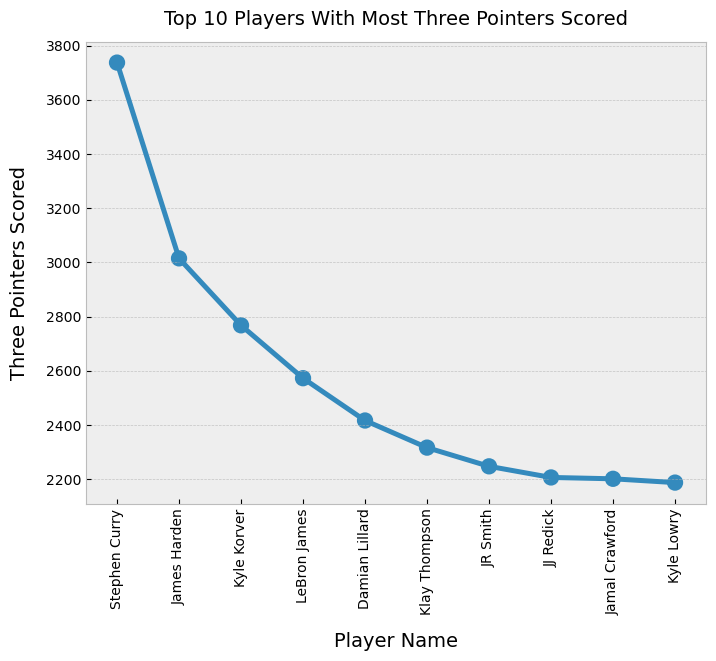

In [29]:
# Performing analysis on the total three-pointers scored by each player. 

players_analysis = nba_df.groupby('PLAYER_NAME')['FG3M'].sum().sort_values(ascending=False).nlargest(10) 
players_analysis = players_analysis.reset_index()

# Creating a point plot to visualize the top 10 players with the most three-pointers scored.

plt.figure(figsize=(8,6))

sns.pointplot(data=players_analysis, x='PLAYER_NAME', y='FG3M')

plt.title('Top 10 Players With Most Three Pointers Scored', fontsize=14, pad=12)
plt.xlabel('Player Name', fontsize=14, labelpad=12)
plt.ylabel('Three Pointers Scored', fontsize=14, labelpad=12) 
plt.xticks(rotation='vertical')
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()   

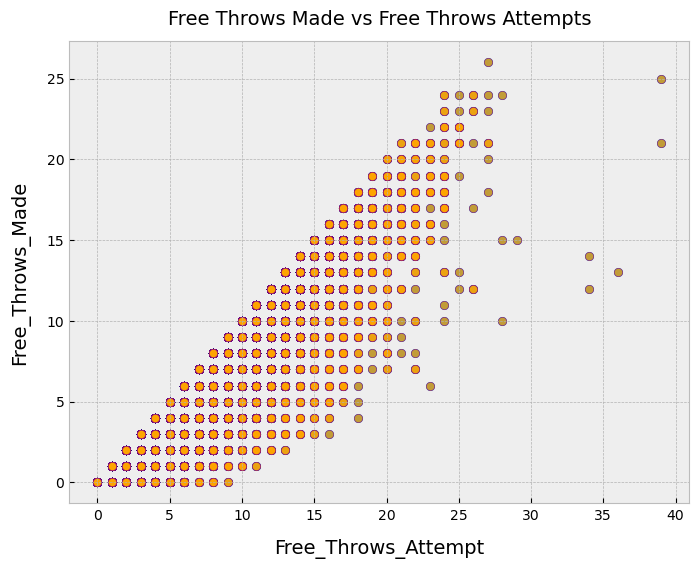

In [30]:
# Creating a scatter plot comparing free throws made to free throws attempted. 

plt.figure(figsize=(8,6))

plt.scatter(nba_df['FTA'],nba_df['FTM'])  

plt.scatter(nba_df['FTA'], nba_df['FTM'], alpha=0.7, color='orange', edgecolors='purple')
plt.title('Free Throws Made vs Free Throws Attempts', fontsize=14, pad=12) 
plt.xlabel('Free_Throws_Attempt', fontsize=14, labelpad=12)
plt.ylabel('Free_Throws_Made', fontsize=14, labelpad=12)
plt.show()    

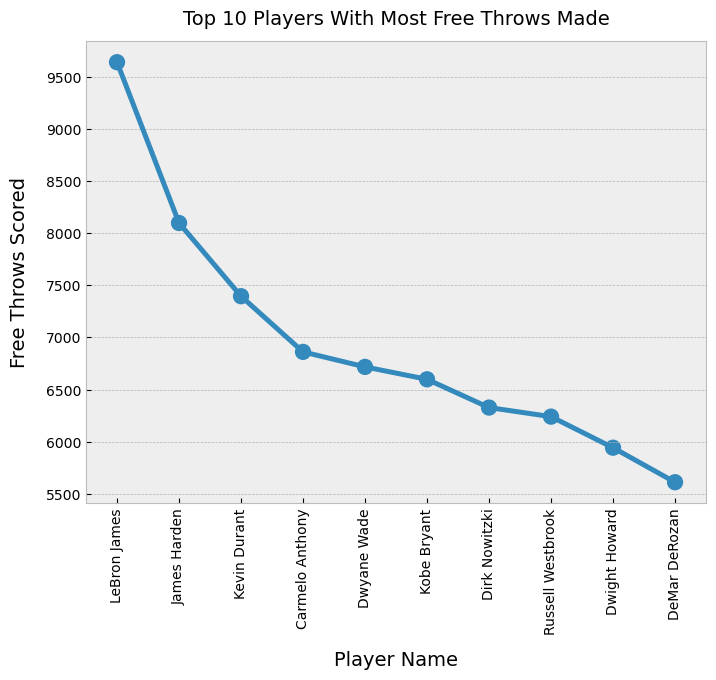

In [31]:
# Performing analysis on the total free throws made by each player. 

players_analysis = nba_df.groupby('PLAYER_NAME')['FTM'].sum().sort_values(ascending=False).nlargest(10)   
players_analysis = players_analysis.reset_index() 

# Creating a point plot to visualize the top 10 players with the most free throws made.

plt.figure(figsize=(8,6))

sns.pointplot(data=players_analysis, x='PLAYER_NAME', y='FTM')
plt.title('Top 10 Players With Most Free Throws Made', fontsize=14, pad=12) 
plt.xlabel('Player Name', fontsize=14, labelpad=12)
plt.ylabel('Free Throws Scored', fontsize=14, labelpad=12)
plt.xticks(rotation='vertical')
plt.show()    

In [32]:
# Calculating the total rebounds (REB) for each player.

players_analysis = nba_df.groupby('PLAYER_NAME')['REB'].sum().sort_values(ascending=False).nlargest(10)    
players_analysis = players_analysis.reset_index() 
print("Top 10 Players with Most Total Rebounds (REB):")

players_analysis  

Top 10 Players with Most Total Rebounds (REB):


,PLAYER_NAME,REB
0,Dwight Howard,16238.0
1,LeBron James,12653.0
2,Tim Duncan,11490.0
3,Pau Gasol,11270.0
4,DeAndre Jordan,11001.0
5,Zach Randolph,10480.0
6,Tyson Chandler,10334.0
7,Andre Drummond,10001.0
8,Dirk Nowitzki,9641.0
9,LaMarcus Aldridge,9524.0


In [33]:
# Calculating the total assists (AST) for each player. 

players_analysis = nba_df.groupby('PLAYER_NAME')['AST'].sum().sort_values(ascending=False).nlargest(10)    
players_analysis = players_analysis.reset_index()  
print("Top 10 Players with Most Assists (AST):")

players_analysis 

Top 10 Players with Most Assists (AST):


,PLAYER_NAME,AST
0,Chris Paul,12215.0
1,LeBron James,12047.0
2,Russell Westbrook,9593.0
3,Rajon Rondo,8842.0
4,Steve Nash,8483.0
5,Deron Williams,7489.0
6,Tony Parker,7360.0
7,James Harden,7333.0
8,Kyle Lowry,7121.0
9,Jason Kidd,6664.0


In [34]:
# Calculating the total blocks (BLK) for each player. 

players_analysis = nba_df.groupby('PLAYER_NAME')['BLK'].sum().sort_values(ascending=False).nlargest(10)    
players_analysis = players_analysis.reset_index() 
print("Top 10 Players with Most Blocks (BLK):")

players_analysis 

Top 10 Players with Most Blocks (BLK):


,PLAYER_NAME,BLK
0,Dwight Howard,2500.0
1,Tim Duncan,2245.0
2,Serge Ibaka,2077.0
3,Pau Gasol,1885.0
4,Josh Smith,1829.0
5,Brook Lopez,1676.0
6,DeAndre Jordan,1645.0
7,Marcus Camby,1636.0
8,Samuel Dalembert,1587.0
9,Anthony Davis,1545.0


In [35]:
# Calculating the total turnovers (TO) for each player. 

players_analysis = nba_df.groupby('PLAYER_NAME')['TO'].sum().sort_values(ascending=False).nlargest(10)     
players_analysis = players_analysis.reset_index() 
print("Top 10 Players with Most Turnovers (TO):")

players_analysis 

Top 10 Players with Most Turnovers (TO):


,PLAYER_NAME,TO
0,LeBron James,5808.0
1,Russell Westbrook,4699.0
2,James Harden,4112.0
3,Dwyane Wade,3974.0
4,Dwight Howard,3688.0
5,Kevin Durant,3438.0
6,Carmelo Anthony,3324.0
7,Chris Paul,3184.0
8,Stephen Curry,3101.0
9,Kobe Bryant,3084.0


In [36]:
# Calculating the total personal fouls (PF) for each player. 

players_analysis = nba_df.groupby('PLAYER_NAME')['PF'].sum().sort_values(ascending=False).nlargest(10)    
players_analysis = players_analysis.reset_index() 
print("Top 10 Players with Most Personal Fouls (PF):")

players_analysis  

Top 10 Players with Most Personal Fouls (PF):


,PLAYER_NAME,PF
0,Dwight Howard,4450.0
1,Carmelo Anthony,3890.0
2,Paul Millsap,3698.0
3,Vince Carter,3332.0
4,Chris Paul,3255.0
5,Kyle Lowry,3195.0
6,Tyson Chandler,3194.0
7,LeBron James,3148.0
8,Russell Westbrook,3041.0
9,Paul Pierce,3035.0


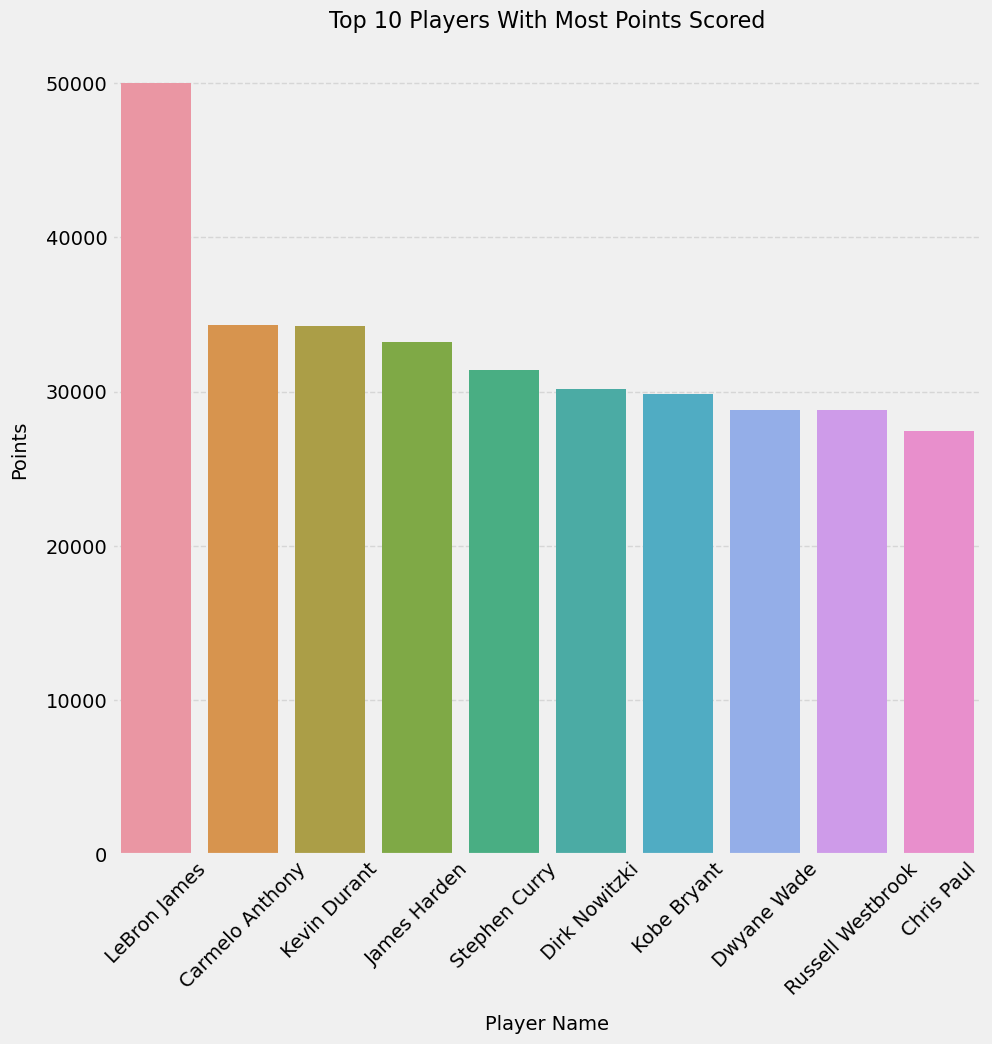

In [37]:
# Calculating the total points scored by each player. 

players_analysis = nba_df.groupby('PLAYER_NAME')['PTS'].sum().sort_values(ascending=False).nlargest(10)     
players_analysis = players_analysis.reset_index() 

# Creating a bar plot to visualize the top 10 players with the most points scored.

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))

sns.barplot(data=players_analysis, x='PLAYER_NAME', y='PTS')
plt.title('Top 10 Players With Most Points Scored', fontsize=16, pad=12)
plt.xlabel('Player Name', fontsize=14, labelpad=12)
plt.ylabel('Points', fontsize=14, labelpad=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()  

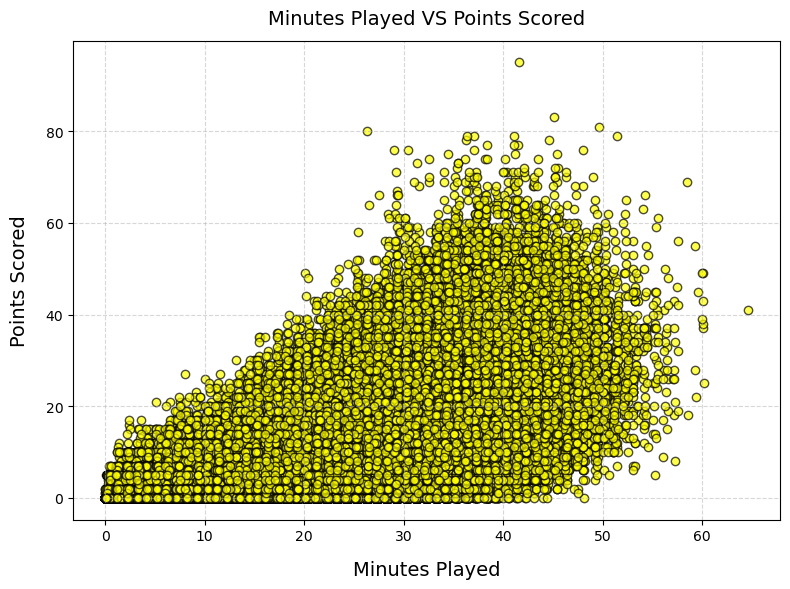

In [38]:
# Creating a scatter plot comparing minutes played to points scored. 

plt.style.use('default') 
plt.figure(figsize=(8, 6))

plt.scatter(nba_df['MIN'], nba_df['PTS'], alpha=0.7, color='Yellow', edgecolors='black')
plt.title('Minutes Played VS Points Scored', fontsize=14, pad=12)
plt.xlabel('Minutes Played', fontsize=14, labelpad=12)
plt.ylabel('Points Scored', fontsize=14, labelpad=12)
plt.grid(axis='both', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()  

In [39]:
# Function to calculate and return career statistics of a given player.
# It examines the player's performance across various metrics throughout their career. 

def player_statistics(player_name):
    
    games_count = nba_df[nba_df['PLAYER_NAME']==player_name]['GAME_ID'].value_counts().shape[0] 
    clubs_played = nba_df[nba_df['PLAYER_NAME']==player_name]['TEAM_ABBREVIATION'].unique().tolist()
    minutes_count = round(sum(nba_df[nba_df['PLAYER_NAME']==player_name]['MIN'].tolist()),3)
    fgm_points = sum(nba_df[nba_df['PLAYER_NAME']==player_name]['FGM'].tolist())
    fg3m_points = sum(nba_df[nba_df['PLAYER_NAME']==player_name]['FG3M'].tolist())
    ftm_points = sum(nba_df[nba_df['PLAYER_NAME']==player_name]['FTM'].tolist())
    reb_points = sum(nba_df[nba_df['PLAYER_NAME']==player_name]['REB'].tolist()) 
    astist_points = sum(nba_df[nba_df['PLAYER_NAME']==player_name]['AST'].tolist())
    steal_points = sum(nba_df[nba_df['PLAYER_NAME']=='LeBron James']['STL'].tolist())  
    block_points = sum(nba_df[nba_df['PLAYER_NAME']==player_name]['BLK'].tolist()) 
    take_over = sum(nba_df[nba_df['PLAYER_NAME']==player_name]['TO'].tolist()) 
    fouls = sum(nba_df[nba_df['PLAYER_NAME']==player_name]['PF'].tolist())  
    overall_points = sum(nba_df[nba_df['PLAYER_NAME']==player_name]['PTS'].tolist())   
    
    # Creating a DataFrame containing the career statistics data of the player.
    
    player_dataframe = pd.DataFrame([{ 
        'Player_Name':player_name,
        'Games_Played':games_count,
        'Clubs_Played':clubs_played,
        'MIN':minutes_count,
        'FGM':fgm_points,
        'FG3M':fg3m_points,
        'FTM':ftm_points,
        'REB':reb_points,
        'AST':astist_points,
        'STL':steal_points,
        'BLK':block_points,
        'TO':take_over,
        'PF':fouls,
        'PTS':overall_points }]) 
    
    return player_dataframe 

In [40]:
print("Player Carrier Statistics: ")

# Input player name. 

print("\033[1m", end='')  
player_statistics('Stephen Curry')  

Player Carrier Statistics: 


,Player_Name,Games_Played,Clubs_Played,MIN,FGM,FG3M,FTM,REB,AST,STL,BLK,TO,PF,PTS
0,Stephen Curry,977,[GSW],33481.16,8152.0,3737.0,3916.0,4590.0,6290.0,2619.0,233.0,3101.0,2346.0,31431.0


In [41]:
# Selecting the relevant columns/features required for training the machine learning model. 

nba_df = nba_df[['MIN','FGM','FG3M','FTM','REB','AST','STL','BLK','TO','PF','PTS','MODIFIED_PLUS_MINUS']] 

In [42]:
# Displaying a random sample of 5 rows from the NBA dataset.
# This provides a glimpse of the selected features and target variable for analysis.

nba_df.sample(5) 

,MIN,FGM,FG3M,FTM,REB,AST,STL,BLK,TO,PF,PTS,MODIFIED_PLUS_MINUS
523559,12.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
51390,17.27,2.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,1.0,4.0,0
94721,30.44,6.0,1.0,1.0,3.0,1.0,2.0,1.0,0.0,3.0,16.0,0
541795,21.35,0.0,0.0,2.0,2.0,0.0,0.0,0.0,2.0,2.0,2.0,0
227522,38.05,12.0,2.0,7.0,4.0,9.0,1.0,0.0,5.0,3.0,37.0,1


In [43]:
# Printing the shape of the finalized dataset. 

print("Shape of the DataFrame:", nba_df.shape)

Shape of the DataFrame: (516595, 12)


In [44]:
# Generating descriptive statistics for the finalized NBA dataset. 

nba_df.describe() 

,MIN,FGM,FG3M,FTM,REB,AST,STL,BLK,TO,PF,PTS,MODIFIED_PLUS_MINUS
count,516595.000000,516595.000000,516595.000000,516595.000000,516595.000000,516595.000000,516595.000000,516595.000000,516595.000000,516595.000000,516595.000000,516595.000000
mean,22.939543,3.619987,0.779380,1.734765,4.091300,2.118364,0.723437,0.464575,1.317347,2.000412,11.312880,0.460270
std,11.286409,3.048452,1.228051,2.361663,3.511606,2.492652,0.975084,0.867335,1.403382,1.501170,9.706031,0.498419
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.470000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.000000
50%,23.390000,3.000000,0.000000,1.000000,3.000000,1.000000,0.000000,0.000000,1.000000,2.000000,9.000000,0.000000
75%,32.070000,5.000000,1.000000,3.000000,6.000000,3.000000,1.000000,1.000000,2.000000,3.000000,17.000000,1.000000
max,64.580000,28.000000,14.000000,26.000000,31.000000,25.000000,10.000000,12.000000,12.000000,6.000000,95.000000,1.000000


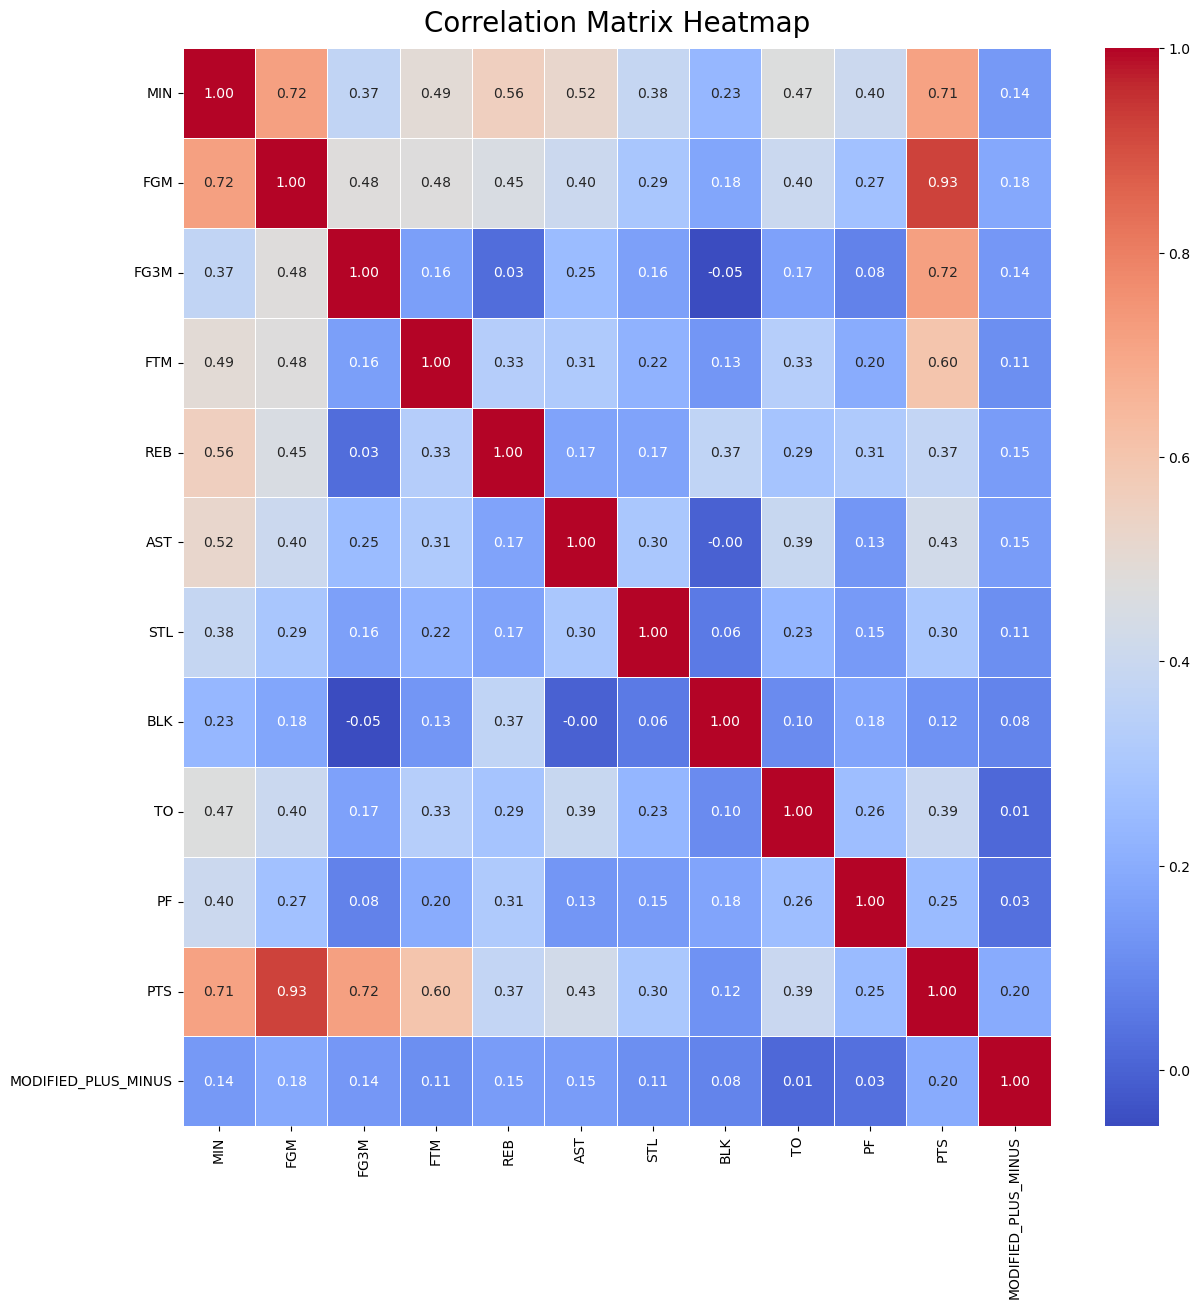

In [45]:
# Plotting a heatmap of the correlation matrix to visualize the relationships between variables. 

plt.style.use('default')
plt.figure(figsize=(14, 14))
correlation_matrix = nba_df.corr()
plt.title('Correlation Matrix Heatmap', fontsize=20, pad=12)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()  

In [46]:
# Defining features (X) and target variable (y) for the machine learning model. 

X = nba_df[['MIN','FGM','FG3M','FTM','REB','AST','STL','BLK','TO','PF','PTS']] 
y = nba_df['MODIFIED_PLUS_MINUS'] 

In [47]:
# Splitting the dataset into training and testing sets using train_test_split function from sklearn.model_selection module. 

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

In [48]:
# Printing the shape of the training and testing sets.

print(X_train.shape, X_test.shape) 

(413276, 11) (103319, 11)


In [49]:
# Importing Logistic Regression algorithm. 

from sklearn.linear_model import LogisticRegression 

In [50]:
# Initializing a Logistic Regression model with the 'liblinear' solver.
# This solver is effective for binary classification problems.

log_model = LogisticRegression(solver='liblinear')  

In [51]:
# Training the Logistic Regression model using the fit method. 

log_model.fit(X_train,y_train)  

LogisticRegression(solver='liblinear')

In [52]:
# Extracting the coefficients (weights) of the features from the trained Logistic Regression model. 

list_of_weights = log_model.coef_.tolist()[0]  

In [53]:
# Creating a list of column names (features) from the original dataset. 

list_of_columns = X.columns.tolist()

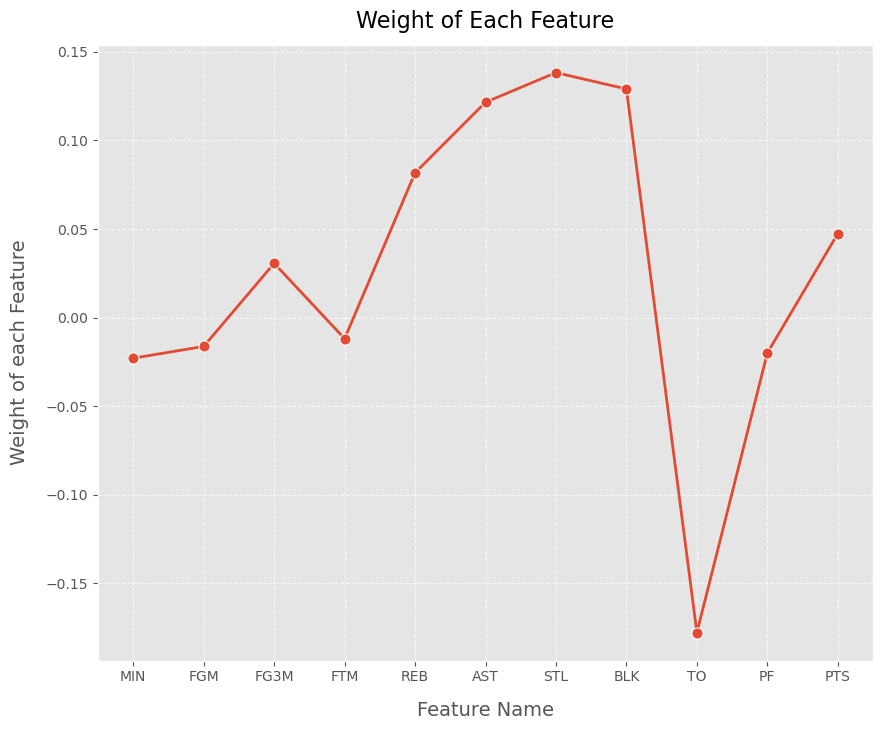

In [54]:
# Creating a DataFrame containing the weights of each feature used in the Logistic Regression model. 

nba_weight_df = pd.DataFrame({'Column':list_of_columns,'Weight':list_of_weights})  

# Visualizing the weights of each feature using a line plot.

plt.style.use('ggplot')
plt.figure(figsize=(10, 8)) 

# The plot helps in understanding the importance of each feature in the model's decision-making process. 

sns.lineplot(data=nba_weight_df, x='Column', y='Weight', marker='o', markersize=8, linewidth=2)
plt.title('Weight of Each Feature', fontsize=16, pad=12)
plt.xlabel('Feature Name', fontsize=14, labelpad=12)
plt.ylabel('Weight of each Feature', fontsize=14, labelpad=12) 
plt.grid(True, linestyle='--', alpha=0.7)
plt.show() 

In [55]:
# Importing necessary metrics from scikit-learn library for evaluating the performance of the machine learning model. 

from sklearn.metrics import accuracy_score , classification_report, confusion_matrix   

In [56]:
# Generating predictions using the trained Logistic Regression model on the testing set (X_test). 

y_pred = log_model.predict(X_test) 

In [57]:
# Calculating the accuracy of the Logistic Regression model. 

logistic_reg_accuracy = accuracy_score(y_test,y_pred) 

In [58]:
# Displaying the accuracy of the Logistic Regression model as a percentage. 

logistic_reg_accuracy*100

61.84051336153079

In [59]:
# Generating predictions using the trained Logistic Regression model on the training set (X_train). 

y_pred_train = log_model.predict(X_train)  

In [60]:
# Calculating the accuracy of the Logistic Regression model on the training set. 

accuracy_score(y_train,y_pred_train)*100

61.712027797404154

In [61]:
# Generating a classification report to evaluate the performance of the Logistic Regression model. 

print(classification_report(y_test, y_pred))   

              precision    recall  f1-score   support

           0       0.62      0.77      0.69     55871
           1       0.62      0.44      0.52     47448

    accuracy                           0.62    103319
   macro avg       0.62      0.61      0.60    103319
weighted avg       0.62      0.62      0.61    103319



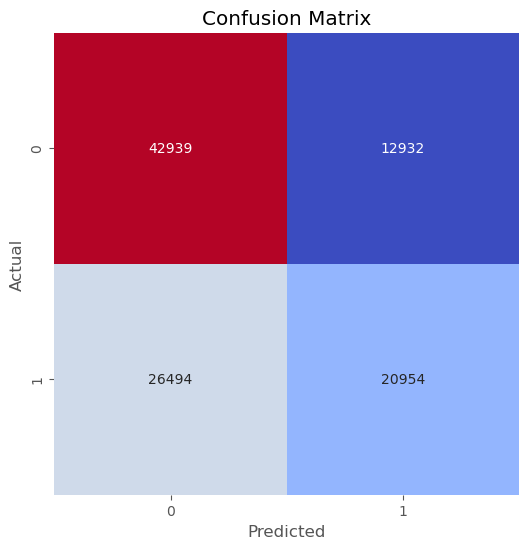

In [62]:
# Generating a confusion matrix to visualize the performance of the Logistic Regression model. 

conf_mat = confusion_matrix(y_test, y_pred) 

plt.figure(figsize=(6, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()   

In [63]:
# Importing the 'pickle' module. 

import pickle

In [64]:
# Saving the trained Logistic Regression model to a file named 'Player_Impact.pkl' using the pickle.dump() function.
# The model is serialized and stored in binary format ('wb' mode) for later use in prediction or deployment. 

pickle.dump(log_model, open('Player_Impact.pkl','wb'))  

In [65]:
# Loading the serialized Logistic Regression model from the 'Player_Impact.pkl' file using the pickle.load() function.
# The model is deserialized and stored in the variable 'predict_output' for making predictions or further analysis. 

predict_output = pickle.load(open('Player_Impact.pkl','rb'))     

In [66]:
# Creating a DataFrame named 'dataframe' with specific input values. 
# This sample input can be used to make predictions using the pre-trained Logistic Regression model. 

dataframe = pd.DataFrame([{ 
    'MIN':24.00,'FGM':3,'FG3M':2,'FTM':2,'REB':2,'AST':3,'STL':2,'BLK':1,'TO':2,'PF':1,'PTS':14 }]) 

In [67]:
# Displaying the input dataframe. 

dataframe

,MIN,FGM,FG3M,FTM,REB,AST,STL,BLK,TO,PF,PTS
0,24.0,3,2,2,2,3,2,1,2,1,14


In [68]:
# Making predictions using the pre-trained Logistic Regression model ('predict_output') on the provided input data ('dataframe').
# The predicted label is obtained by calling the predict method on the model and passing the input data.

predicted_ans = predict_output.predict(dataframe)[0] 

In [69]:
# Checking if the predicted label (predicted_ans) is equal to 1.
# If the predicted label is 1, it indicates that the player's performance is making a positive impact.
# If the predicted label is not equal to 1, it indicates that the player's performance is not making a positive impact.

print("\033[1m", end='')  

if predicted_ans==1:
    print("Based on Player's Performance, Making Positive Impact") 
else:
    print("Based on Player's Performance, Making Negative Impact") 

Based on Player's Performance, Making Positive Impact


In [70]:
# Importing the KNeighborsClassifier class from the scikit-learn library. 

from sklearn.neighbors import KNeighborsClassifier

In [71]:
# Initializing a KNeighborsClassifier model with 5 neighbors. 

knn_model = KNeighborsClassifier(n_neighbors=5) 

In [72]:
# Training the KNeighborsClassifier model using the fit method. 

knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [73]:
# Generating predictions using the trained KNeighborsClassifier model (knn_model) on the testing set (X_test). 

import warnings

# Suppressing FutureWarnings. 

warnings.simplefilter(action='ignore', category=FutureWarning)

y_pred_knn = knn_model.predict(X_test)

In [74]:
# Calculating the accuracy of the KNeighborsClassifier model. 

knn_accuracy = accuracy_score(y_test,y_pred_knn)  

In [75]:
# Displaying the accuracy as a percentage. 

knn_accuracy*100

56.97887126278807

In [76]:
# The accuracy table shows the model names and their corresponding accuracies. 

accuracy_data = {
    'Model': ['Logistic Regression','KNN Algorithm'],
    'Accuracy': [logistic_reg_accuracy,knn_accuracy] 
}

accuracy_df = pd.DataFrame(accuracy_data)

print("\033[1m", end='')  
print("Accuracy Table:")
accuracy_df 

Accuracy Table:


,Model,Accuracy
0,Logistic Regression,0.618405
1,KNN Algorithm,0.569789
